In [21]:
# Add parent directory to python path (needed for modules imports from src)
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Import modules
from src.matches import get_all_match_ids, load_all_events
from src.dribbles import get_all_dribbles
from src.player_info import get_player_info

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from mplsoccer import Pitch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get all match events

In [6]:
match_ids = get_all_match_ids(competition_id=55, season_id=282)
df_all_events = load_all_events(match_ids)

In [7]:
df_all_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187858 entries, 0 to 187857
Data columns (total 87 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              187858 non-null  object 
 1   index                           187858 non-null  int64  
 2   period                          187858 non-null  int64  
 3   timestamp                       187858 non-null  object 
 4   minute                          187858 non-null  int64  
 5   second                          187858 non-null  int64  
 6   possession                      187858 non-null  int64  
 7   duration                        136240 non-null  float64
 8   match_id                        187858 non-null  int64  
 9   type_id                         187858 non-null  int64  
 10  type_name                       187858 non-null  object 
 11  possession_team_id              187858 non-null  int64  
 12  possession_team_

# Get all dribbles

In [19]:
df_dribbles = get_all_dribbles(match_ids, df_all_events)

df_dribbles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 89 to 187651
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         1280 non-null   int64  
 1   type_name        1280 non-null   object 
 2   player_id        1280 non-null   float64
 3   outcome_name     1280 non-null   object 
 4   x                1280 non-null   float64
 5   y                1280 non-null   float64
 6   danger_dribble   1280 non-null   bool   
 7   xg_from_dribble  1280 non-null   float64
 8   dribble_to_goal  1280 non-null   bool   
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 82.5+ KB


# Get player info

In [22]:
df_player_info = get_player_info(match_ids)
df_player_info.head()

,player_id,player_name,player_short_name,team_name,positions
0,2954,Youri Tielemans,Youri Tielemans,Belgium,"{9, 11}"
1,2972,Marcus Thuram,Marcus Thuram,France,"{16, 21, 23}"
2,2988,Memphis Depay,Memphis Depay,Netherlands,"{19, 21, 23}"
3,3009,Kylian Mbappé Lottin,Kylian Mbappé,France,"{21, 23, 24}"
4,3026,Adrien Rabiot,Adrien Rabiot,France,"{16, 11, 15}"


# Create pitch plot

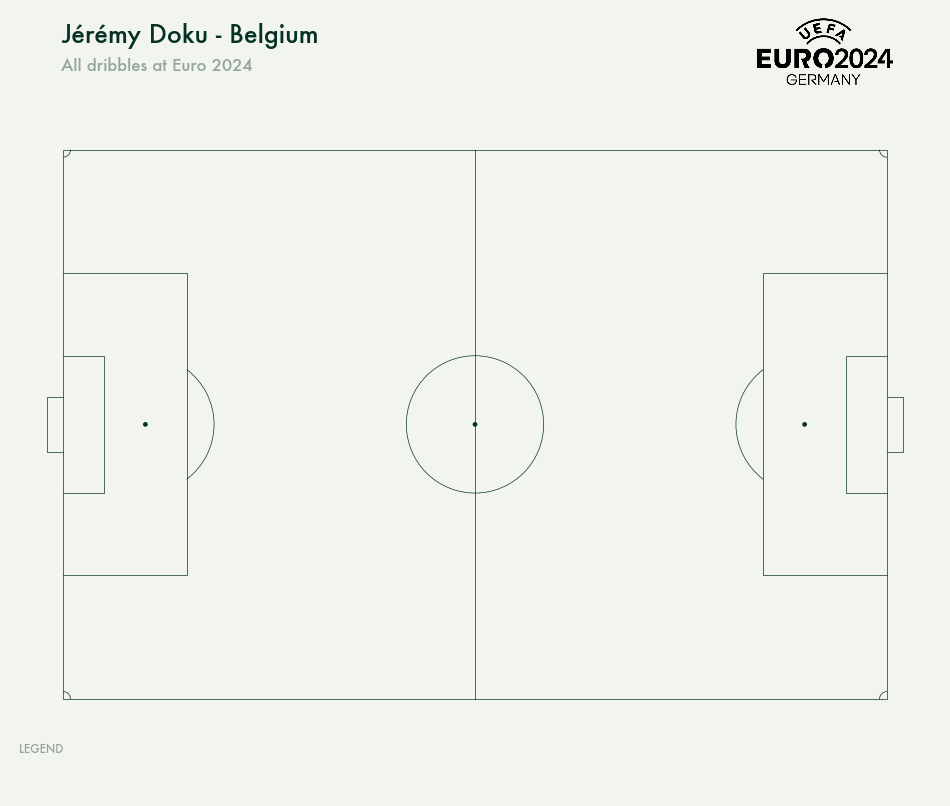

In [56]:
def create_pitch_plot(df_dribbles, df_player_info, player_id):
    """
    Create a pitch plot for a player.

    Parameters
    ----------
    df_dribbles: pd.DataFrame
        The dataframe with all dribbles of the season.
    df_player_info: pd.DataFrame
        The dataframe with player info.
    player_id: int
        The id of the player to create the pitch plot for.
    """

    # Get player and team name
    team_name = df_player_info.loc[df_player_info["player_id"] == player_id, "team_name"].values[0]
    player_name = df_player_info.loc[df_player_info["player_id"] == player_id, "player_short_name"].values[0]
    
    # Plot dimensions
    title_height_ratio = 0.075
    legend_height_ratio = 0.075
    figsize = (12, 10)
    #figsize = (10, 8)
    
    # Plot colors
    background_color = "#f2f4ee"
    dark_color = "#053225"
    dribble_color = "#6D98BA"
    danger_dribble_color = "#CA2E55"

    # Text styles
    font = 'Futura'
    h1_size = 18
    h2_size = 16
    h3_size = 14
    p_size = 12
    label_size = 8
    alpha = 0.4

    # Apply styling
    plt.rcParams['font.family'] = font
    plt.rcParams.update({
        'text.color': dark_color,
        'axes.labelcolor': dark_color,
        'axes.edgecolor': dark_color,
        'xtick.color': dark_color,
        'ytick.color': dark_color,
        'grid.color': dark_color,
    })

    # Create figure
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 1, height_ratios=[title_height_ratio, 1-title_height_ratio-legend_height_ratio, legend_height_ratio])
    
    # Set background
    fig.set_facecolor(background_color)
    
    # Title axis
    heading_ax = fig.add_subplot(gs[0])
    heading_ax.axis('off')
    
    # Main plot axis
    main_ax = fig.add_subplot(gs[1])

    # Legend axis
    legend_ax = fig.add_subplot(gs[2])
    legend_ax.axis('off')



    # HEADING AXIS
    heading_ax.text(0.055, 0.8, f"{player_name} - {team_name}", fontsize=h1_size, ha='left', va='center')
    heading_ax.text(0.055, 0.2, f'All dribbles at Euro 2024', fontsize=p_size, ha='left', va='center', alpha=alpha)

    # Add Euros 2024 logo
    logo = mpimg.imread('../euro_2024_logo.png')
    imagebox = OffsetImage(logo, zoom=0.2)
    ab = AnnotationBbox(
        imagebox, 
        (0.95, 0.5),                # Position of the logo (x, y)
        xycoords='axes fraction',   # Coordinate system for the position (fraction of the axes)
        box_alignment=(1, 0.5),     # Alignment of the logo relative to the position (x, y) (0, 0) is top left, (1, 1) is bottom right
        frameon=False,              # Remove frame
        zorder=100                  # Ensure the logo is on top of other elements
    )
    heading_ax.add_artist(ab)



    # MAIN AXIS
    pitch = Pitch(
        line_color=dark_color, 
        linewidth=0.5, 
        half=False, 
        goal_type='box', 
        corner_arcs=True,
        pad_bottom=0.1
    )
    pitch.draw(ax=main_ax)
    main_ax.set_facecolor(background_color)

    dot_color = dark_color
    dot_size = 100
    dot_edgecolor = background_color
    dot_alpha = 1.0



    # LEGEND AXIS
    legend_ax.text(0.01, 0.9, 'LEGEND', fontsize=label_size, ha='left', va='center', alpha=alpha)

    # Save plot
    default_kwargs = {
        'bbox_inches': 'tight',
        'pad_inches': 0.25,
        'facecolor': background_color,
        'dpi': 300
    }
    
    # convert player name to lowercase and replace spaces with underscores
    player_name_filename = player_name.lower().replace(" ", "_")

    fig.savefig(f'../generated_images/pitch_plots/{player_name_filename}_pitch.png', **default_kwargs)
    plt.show()

create_pitch_plot(df_dribbles, df_player_info, 23650)